In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [4]:
# Carregar a imagem de Lenna
imagem = Image.open('lenna.jpg')

# Converter a imagem para escala de cinza
imagem_cinza = imagem.convert('L')

image_array = np.array(imagem_cinza)



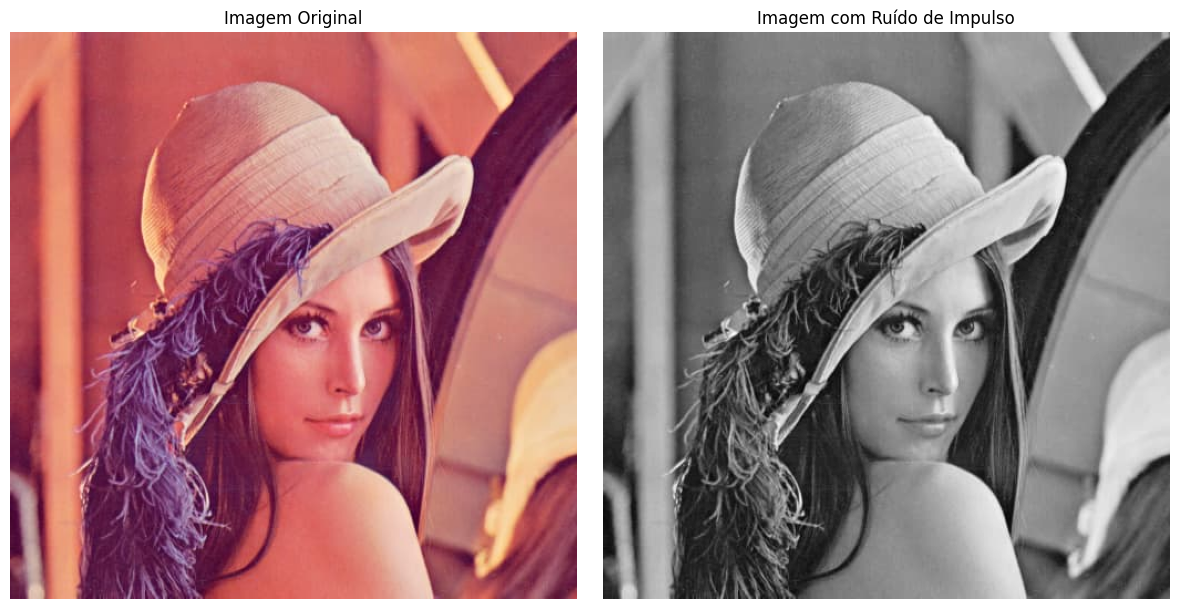

In [5]:
# Exibir a imagem original e a imagem com ruído
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(imagem, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagem_cinza, cmap='gray')
plt.title('Imagem com Ruído de Impulso')
plt.axis('off')

plt.tight_layout()
plt.show()

In [6]:
# Passo 1: Construir o vetor com os níveis de cinza
x = np.arange(-255, 256, 1)

# Passo 2: Normalizar o vetor x
x_normalized = x / 255.0

# Passo 3: Construir a f.d.p. para os pontos do vetor x
b = 0.4  # Parâmetro da distribuição Rayleigh
a = 0    # Parâmetro de deslocamento
pdf = np.where(x_normalized >= a, (2 / b) * (x_normalized - a) * np.exp(-((x_normalized - a)**2) / b), 0)

# Passo 4: Construir a f.d.a. a partir do vetor da f.d.p.
cdf = np.cumsum(pdf)
cdf = cdf / cdf[-1]  # Normalizar a f.d.a. para que o último valor seja 1

# Passo 6: Escolher a amplitude A do ruído
A = 0.2

# Passo 5: Encontrar qual o nível de cinza para o qual a f.d.a. é mais próxima de um número aleatório
random_values = np.random.uniform(size=image_array.shape)
noise = np.interp(random_values, cdf, x_normalized) * A
       

# Passo 7: Adicionar o ruído ao pixel da imagem
noisy_image_array = image_array + noise * 255

# Garantir que os valores dos pixels estejam no intervalo [0, 255]
noisy_image_array = np.clip(noisy_image_array, 0, 255).astype(np.uint8)

# Passo 8: Repetir para todos os pixels da imagem
noisy_image = Image.fromarray(noisy_image_array)


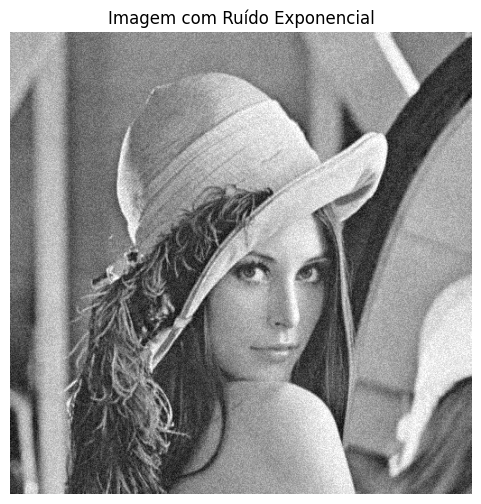

In [7]:
# Exibir a imagem com ruído
plt.figure(figsize=(6, 6))
plt.imshow(noisy_image, cmap='gray')
plt.title('Imagem com Ruído Exponencial')
plt.axis('off')
plt.show()

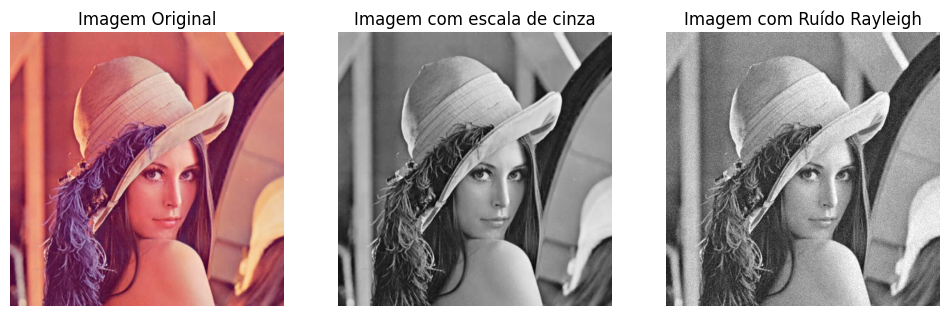

<Figure size 640x480 with 0 Axes>

In [8]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(imagem, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(imagem_cinza, cmap='gray')
plt.title('Imagem com escala de cinza')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(noisy_image, cmap='gray')
plt.title('Imagem com Ruído Rayleigh')
plt.axis('off')
plt.show()

plt.tight_layout()
plt.show()

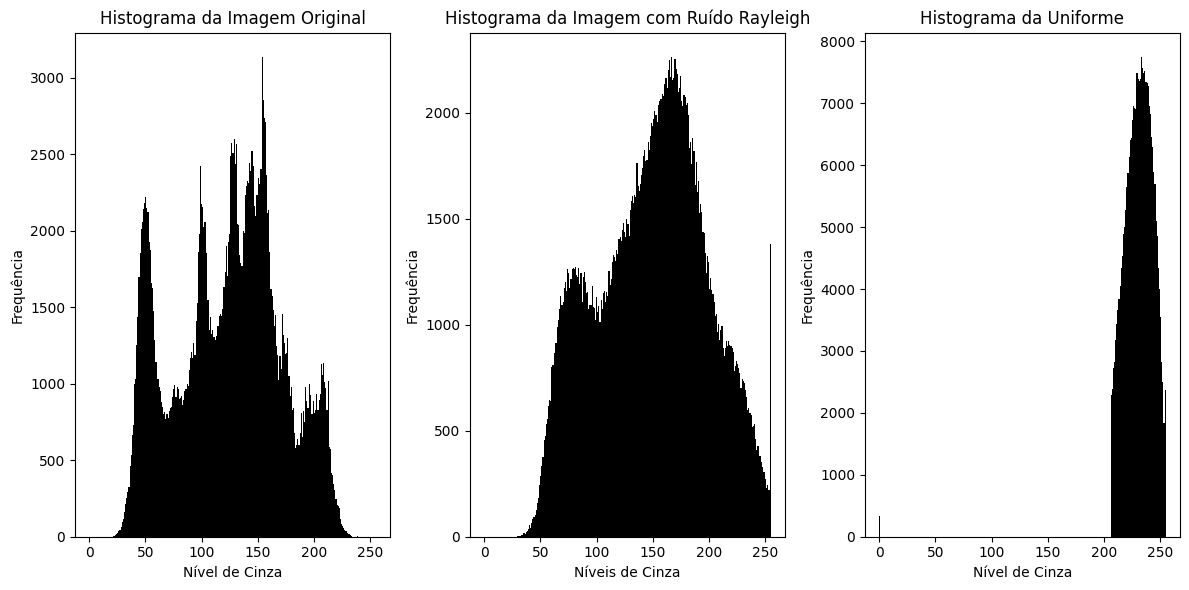

In [9]:
# Plotar os histogramas da imagem original e modificada
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(image_array.flatten(), bins=256, range=(0, 255), color='black')
plt.title("Histograma da Imagem Original")
plt.xlabel("Nível de Cinza")
plt.ylabel("Frequência")
    

plt.subplot(1, 3, 2)
plt.hist(noisy_image_array.ravel(), bins=256, range=(0, 255), color='black')
plt.title('Histograma da Imagem com Ruído Rayleigh')
plt.xlabel('Níveis de Cinza')
plt.ylabel('Frequência')

aux = abs(image_array - noisy_image_array)

plt.subplot(1, 3, 3)
plt.hist(aux.flatten(), bins=255, range=(0, 255), color='black')
plt.title("Histograma da Rayleigh")
plt.xlabel("Nível de Cinza")
plt.ylabel("Frequência")

plt.tight_layout()
plt.show()

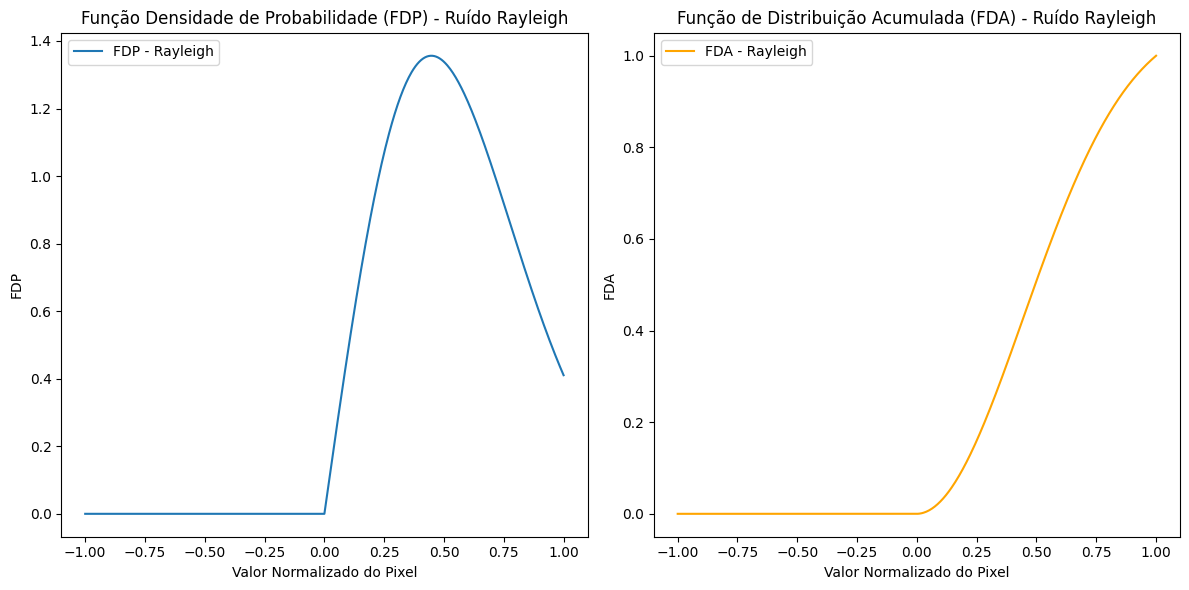

In [10]:
# Plotar a FDP e a FDA
plt.figure(figsize=(12, 6))

# Gráfico da FDP (Função Densidade de Probabilidade)
plt.subplot(1, 2, 1)
plt.plot(x_normalized, pdf, label="FDP - Rayleigh")
plt.title("Função Densidade de Probabilidade (FDP) - Ruído Rayleigh")
plt.xlabel("Valor Normalizado do Pixel")
plt.ylabel("FDP")
plt.legend()

# Gráfico da FDA (Função de Distribuição Acumulada)
plt.subplot(1, 2, 2)
plt.plot(x_normalized, cdf, label="FDA - Rayleigh", color="orange")
plt.title("Função de Distribuição Acumulada (FDA) - Ruído Rayleigh")
plt.xlabel("Valor Normalizado do Pixel")
plt.ylabel("FDA")
plt.legend()

plt.tight_layout()
plt.show()
